In [1]:
%cd ..

/Users/ivallesp/projects/cfavorita


In [2]:
import pandas as pd
import numpy as np

In [3]:
import glob, os

In [4]:
df_items = pd.read_csv("data/items.csv")

base = "/Users/ivallesp/backup_tardigrade/cfavorita_results/"

paths = glob.glob(os.path.join(base, "results*.csv"))

In [5]:
paths

['/Users/ivallesp/backup_tardigrade/cfavorita_results/results_transformer_655325_lag_2.csv',
 '/Users/ivallesp/backup_tardigrade/cfavorita_results/results_transformer_655325_lag_3.csv',
 '/Users/ivallesp/backup_tardigrade/cfavorita_results/results_transformer_655325_lag_1.csv',
 '/Users/ivallesp/backup_tardigrade/cfavorita_results/results_s2s_655325_lag_3.csv',
 '/Users/ivallesp/backup_tardigrade/cfavorita_results/results_s2s_trim_655325_lag_3.csv',
 '/Users/ivallesp/backup_tardigrade/cfavorita_results/results_s2s_trim_655325_lag_2.csv',
 '/Users/ivallesp/backup_tardigrade/cfavorita_results/results_s2s_655325_lag_2.csv',
 '/Users/ivallesp/backup_tardigrade/cfavorita_results/results_s2s_trim_655325_lag_1.csv',
 '/Users/ivallesp/backup_tardigrade/cfavorita_results/results_s2s_655325_lag_1.csv']

## Sparsity

In [6]:
file = paths[0]

In [7]:
df = pd.read_csv(paths[0])

df.target.map(np.expm1).value_counts()[0]/df.target.map(np.expm1).value_counts().sum()

0.5246858950014468

In [8]:
df = pd.read_csv(paths[1])

df.target.map(np.expm1).value_counts()[0]/df.target.map(np.expm1).value_counts().sum()

0.5198615745261863

In [9]:
df = pd.read_csv(paths[2])

df.target.map(np.expm1).value_counts()[0]/df.target.map(np.expm1).value_counts().sum()

0.5260679456922743

In [10]:
(0.5246858950014468+0.5198615745261863+0.5260679456922743)/3

0.5235384717399691

## Results

###  Table

In [11]:
for path in reversed(sorted(paths)):
    print(os.path.split(path)[1])

    df = pd.read_csv(path)

    df = df.merge(df_items)
    
    df.perishable = (df.perishable*.25+1)


    from sklearn.metrics import mean_squared_error

    col = "forecast_transformer_655321"

    cols = df.columns[df.columns.str.contains("forecast")]
    rmsle = []
    rmswle = []
    male = []

    for col in cols:
        rmsle.append(np.sqrt(np.mean((df.target - df[col])**2)))
        rmswle.append(np.sqrt((df.perishable*(df.target - df[col])**2).sum()/df.perishable.sum()))
        male.append(np.mean(np.abs(df.target - df[col])))
    print("$", round(np.mean(rmsle), 4), "\\pm", round(np.std(rmsle), 4), "$", " & ",
    "$", round(np.mean(rmswle), 4), "\\pm", round(np.std(rmswle), 4), "$", " & ",
    "$", round(np.mean(male), 4), "\\pm", round(np.std(male), 4), "$")

results_transformer_655325_lag_3.csv
$ 0.5439 \pm 0.0024 $  &  $ 0.5436 \pm 0.0023 $  &  $ 0.3386 \pm 0.001 $
results_transformer_655325_lag_2.csv
$ 0.5495 \pm 0.0021 $  &  $ 0.5486 \pm 0.0021 $  &  $ 0.3415 \pm 0.0012 $
results_transformer_655325_lag_1.csv
$ 0.5414 \pm 0.0015 $  &  $ 0.5407 \pm 0.0014 $  &  $ 0.3366 \pm 0.0012 $
results_s2s_trim_655325_lag_3.csv
$ 0.5381 \pm 0.0008 $  &  $ 0.5377 \pm 0.0008 $  &  $ 0.3442 \pm 0.0008 $
results_s2s_trim_655325_lag_2.csv
$ 0.5413 \pm 0.0019 $  &  $ 0.5403 \pm 0.0018 $  &  $ 0.3444 \pm 0.0012 $
results_s2s_trim_655325_lag_1.csv
$ 0.5423 \pm 0.0015 $  &  $ 0.5414 \pm 0.0016 $  &  $ 0.3481 \pm 0.0017 $
results_s2s_655325_lag_3.csv
$ 0.538 \pm 0.0016 $  &  $ 0.5376 \pm 0.0016 $  &  $ 0.345 \pm 0.0024 $
results_s2s_655325_lag_2.csv
$ 0.5431 \pm 0.0014 $  &  $ 0.5421 \pm 0.0013 $  &  $ 0.3475 \pm 0.0012 $
results_s2s_655325_lag_1.csv
$ 0.544 \pm 0.0021 $  &  $ 0.5431 \pm 0.0021 $  &  $ 0.3502 \pm 0.0028 $


In [12]:
# Mean
for path in reversed(sorted(paths)):
    print(os.path.split(path)[1])

    df = pd.read_csv(path)

    df = df.merge(df_items)

    df.perishable = (df.perishable*.25+1)


    from sklearn.metrics import mean_squared_error

    col = "forecast_transformer_655321"

    cols = df.columns[df.columns.str.contains("forecast")]
    rmsle = []
    rmswle = []
    male = []

    for col in cols:
        rmsle.append(np.sqrt(np.mean((df.target - df.target.mean())**2)))
        rmswle.append(np.sqrt((df.perishable*(df.target - df.target.mean())**2).sum()/df.perishable.sum()))
        male.append(np.mean(np.abs(df.target - df.target.mean())))
    print("$", round(np.mean(rmsle), 4), "\\pm", round(np.std(rmsle), 4), "$", " & ",
    "$", round(np.mean(rmswle), 4), "\\pm", round(np.std(rmswle), 4), "$", " & ",
    "$", round(np.mean(male), 4), "\\pm", round(np.std(male), 4), "$")

results_transformer_655325_lag_3.csv
$ 1.0422 \pm 0.0 $  &  $ 1.05 \pm 0.0 $  &  $ 0.8744 \pm 0.0 $
results_transformer_655325_lag_2.csv
$ 1.0358 \pm 0.0 $  &  $ 1.0433 \pm 0.0 $  &  $ 0.8655 \pm 0.0 $
results_transformer_655325_lag_1.csv
$ 1.029 \pm 0.0 $  &  $ 1.0363 \pm 0.0 $  &  $ 0.8616 \pm 0.0 $
results_s2s_trim_655325_lag_3.csv
$ 1.0422 \pm 0.0 $  &  $ 1.05 \pm 0.0 $  &  $ 0.8744 \pm 0.0 $
results_s2s_trim_655325_lag_2.csv
$ 1.0358 \pm 0.0 $  &  $ 1.0433 \pm 0.0 $  &  $ 0.8655 \pm 0.0 $
results_s2s_trim_655325_lag_1.csv
$ 1.029 \pm 0.0 $  &  $ 1.0363 \pm 0.0 $  &  $ 0.8616 \pm 0.0 $
results_s2s_655325_lag_3.csv
$ 1.0422 \pm 0.0 $  &  $ 1.05 \pm 0.0 $  &  $ 0.8744 \pm 0.0 $
results_s2s_655325_lag_2.csv
$ 1.0358 \pm 0.0 $  &  $ 1.0433 \pm 0.0 $  &  $ 0.8655 \pm 0.0 $
results_s2s_655325_lag_1.csv
$ 1.029 \pm 0.0 $  &  $ 1.0363 \pm 0.0 $  &  $ 0.8616 \pm 0.0 $


In [13]:
np.random.seed(655321)
# Random
for path in reversed(sorted(paths)):
    print(os.path.split(path)[1])

    df = pd.read_csv(path)

    df = df.merge(df_items)

    df.perishable = (df.perishable*.25+1)


    from sklearn.metrics import mean_squared_error

    col = "forecast_transformer_655321"

    cols = df.columns[df.columns.str.contains("forecast")]
    rmsle = []
    rmswle = []
    male = []

    for col in cols:
        s = df.target.sample(frac=1).values
        rmsle.append(np.sqrt(np.mean((df.target.values - s)**2)))
        rmswle.append(np.sqrt((df.perishable*(df.target.values - s)**2).sum()/df.perishable.sum()))
        male.append(np.mean(np.abs(df.target.values - s)))
    print("$", round(np.mean(rmsle), 4), "\\pm", round(np.std(rmsle), 4), "$", " & ",
    "$", round(np.mean(rmswle), 4), "\\pm", round(np.std(rmswle), 4), "$", " & ",
    "$", round(np.mean(male), 4), "\\pm", round(np.std(male), 4), "$")

results_transformer_655325_lag_3.csv
$ 1.474 \pm 0.0003 $  &  $ 1.4795 \pm 0.0003 $  &  $ 1.0691 \pm 0.0002 $
results_transformer_655325_lag_2.csv
$ 1.4649 \pm 0.0002 $  &  $ 1.4702 \pm 0.0002 $  &  $ 1.0577 \pm 0.0003 $
results_transformer_655325_lag_1.csv
$ 1.4555 \pm 0.0002 $  &  $ 1.4606 \pm 0.0002 $  &  $ 1.0517 \pm 0.0002 $
results_s2s_trim_655325_lag_3.csv
$ 1.4737 \pm 0.0004 $  &  $ 1.4793 \pm 0.0005 $  &  $ 1.0688 \pm 0.0004 $
results_s2s_trim_655325_lag_2.csv
$ 1.4651 \pm 0.0005 $  &  $ 1.4704 \pm 0.0005 $  &  $ 1.0579 \pm 0.0006 $
results_s2s_trim_655325_lag_1.csv
$ 1.4552 \pm 0.0003 $  &  $ 1.4603 \pm 0.0004 $  &  $ 1.0514 \pm 0.0003 $
results_s2s_655325_lag_3.csv
$ 1.4738 \pm 0.0001 $  &  $ 1.4793 \pm 0.0002 $  &  $ 1.0689 \pm 0.0 $
results_s2s_655325_lag_2.csv
$ 1.4646 \pm 0.0001 $  &  $ 1.4699 \pm 0.0001 $  &  $ 1.0574 \pm 0.0001 $
results_s2s_655325_lag_1.csv
$ 1.4554 \pm 0.0004 $  &  $ 1.4606 \pm 0.0004 $  &  $ 1.0516 \pm 0.0004 $


### Daily

In [14]:
import matplotlib.pyplot as plt

In [15]:
list(filter(lambda x: "lag_1" in x, reversed(sorted(paths))))

['/Users/ivallesp/backup_tardigrade/cfavorita_results/results_transformer_655325_lag_1.csv',
 '/Users/ivallesp/backup_tardigrade/cfavorita_results/results_s2s_trim_655325_lag_1.csv',
 '/Users/ivallesp/backup_tardigrade/cfavorita_results/results_s2s_655325_lag_1.csv']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


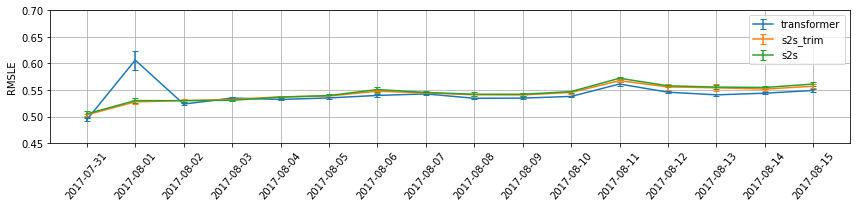

In [16]:
plt.figure(figsize=(12, 3))
names = []
res = []
for path in filter(lambda x: "lag_1" in x, reversed(sorted(paths))):
    if "trim" in path:
        name = "s2s_trim"
    elif "transformer" in path:
        name = "transformer"
    else:
        name = "s2s"
    names.append(name)
    df = pd.read_csv(path)
    df["date"] = df.day.astype(str) + "-" + df.month.astype(str) + "-" + df.year.astype(str)
    df["date"] = pd.to_datetime(df.date, format="%d-%m-%Y")
    cols = df.columns[df.columns.str.contains("forecast")]

    results = []
    for col in cols:
        results.append((df.groupby("date")
         .apply(lambda d: np.sqrt(np.mean((d.target.values - d[col].values)**2)))))

    results = pd.concat(results)
    res.append([x for y in results.reset_index().groupby("date").agg(list)[0].tolist() for x in y])
    results_mu = results.groupby(results.index).mean()
    results_sigma = results.groupby(results.index).std()
    plt.errorbar(range(len(results_mu.index)), results_mu.values, yerr=results_sigma.values, capsize=3)
plt.xticks(range(len(results_mu.index)), results_mu.index.astype(str), rotation=50)
plt.ylim(0.45, 0.7)
plt.grid()
plt.legend(names)
plt.ylabel("RMSLE")
plt.tight_layout()
plt.savefig("lag1_daily_error.eps")


In [17]:
from scipy.stats import f_oneway
f_oneway(*res)

F_onewayResult(statistic=0.4820703729038257, pvalue=0.6181077599661723)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


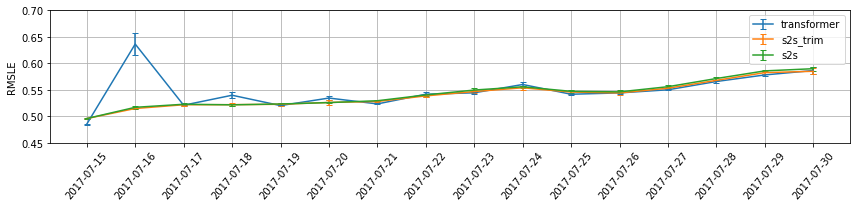

In [18]:
plt.figure(figsize=(12, 3))
names = []
res = []

for path in filter(lambda x: "lag_2" in x, reversed(sorted(paths))):
    if "trim" in path:
        name = "s2s_trim"
    elif "transformer" in path:
        name = "transformer"
    else:
        name = "s2s"
    names.append(name)
    df = pd.read_csv(path)
    df["date"] = df.day.astype(str) + "-" + df.month.astype(str) + "-" + df.year.astype(str)
    df["date"] = pd.to_datetime(df.date, format="%d-%m-%Y")
    cols = df.columns[df.columns.str.contains("forecast")]

    results = []
    for col in cols:
        results.append((df.groupby("date")
         .apply(lambda d: np.sqrt(np.mean((d.target.values - d[col].values)**2)))))

    results = pd.concat(results)
    res.append([x for y in results.reset_index().groupby("date").agg(list)[0].tolist() for x in y])
    results_mu = results.groupby(results.index).mean()
    results_sigma = results.groupby(results.index).std()
    plt.errorbar(range(len(results_mu.index)), results_mu.values, yerr=results_sigma.values, capsize=3)
plt.xticks(range(len(results_mu.index)), results_mu.index.astype(str), rotation=50)
plt.ylim(0.45, 0.7)
plt.grid()
plt.legend(names)
plt.ylabel("RMSLE")
plt.tight_layout()
plt.savefig("lag2_daily_error.eps")


In [19]:
from scipy.stats import f_oneway
f_oneway(*res)

F_onewayResult(statistic=1.7143651637933428, pvalue=0.18230349230764936)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


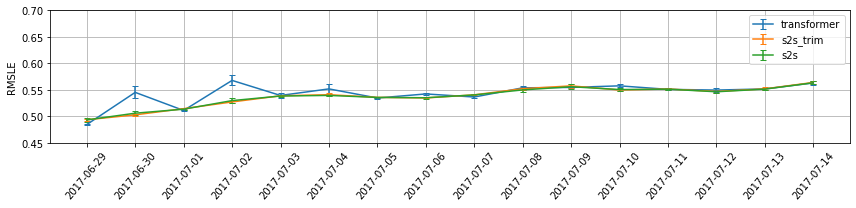

In [20]:
plt.figure(figsize=(12, 3))
names = []
res = []

for path in filter(lambda x: "lag_3" in x, reversed(sorted(paths))):
    if "trim" in path:
        name = "s2s_trim"
    elif "transformer" in path:
        name = "transformer"
    else:
        name = "s2s"
    names.append(name)
    df = pd.read_csv(path)
    df["date"] = df.day.astype(str) + "-" + df.month.astype(str) + "-" + df.year.astype(str)
    df["date"] = pd.to_datetime(df.date, format="%d-%m-%Y")
    cols = df.columns[df.columns.str.contains("forecast")]

    results = []
    for col in cols:
        results.append((df.groupby("date")
         .apply(lambda d: np.sqrt(np.mean((d.target.values - d[col].values)**2)))))

    results = pd.concat(results)
    res.append([x for y in results.reset_index().groupby("date").agg(list)[0].tolist() for x in y])
    results_mu = results.groupby(results.index).mean()
    results_sigma = results.groupby(results.index).std()
    plt.errorbar(range(len(results_mu.index)), results_mu.values, yerr=results_sigma.values, capsize=3)
plt.xticks(range(len(results_mu.index)), results_mu.index.astype(str), rotation=50)
plt.ylim(0.45, 0.7)

plt.grid()
plt.legend(names)
plt.ylabel("RMSLE")
plt.tight_layout()
plt.savefig("lag3_daily_error.eps")


In [21]:
from scipy.stats import f_oneway
f_oneway(*res)

F_onewayResult(statistic=2.380543066526869, pvalue=0.09470890744971264)

### SAMPLES 

In [22]:
from tqdm import tqdm

In [23]:
dfs = []
for path in tqdm(paths):
    if "trim" in path:
        name = "s2s_trim"
    elif "transformer" in path:
        name = "transformer"
    else:
        name = "s2s"
    
    if "lag_3" in path:
        lag = 3
    elif "lag_2" in path:
        lag = 2
    else:
        lag = 1
        
    df = pd.read_csv(path)
    df["date"] = df.day.astype(str) + "-" + df.month.astype(str) + "-" + df.year.astype(str)
    df["date"] = pd.to_datetime(df.date, format="%d-%m-%Y")
    cols = df.columns[df.columns.str.contains("forecast")]
    newcols = ["forecast_"+str(i) for i in range(len(cols))]
    df = df.rename(columns = dict(zip(cols, newcols)))
    df["model"] = name
    df["lag"] = lag
    dfs.append(df)

100%|██████████| 9/9 [02:58<00:00, 19.80s/it]


In [24]:
df_unified = pd.concat(dfs)

In [25]:
cases = df.groupby(["store_nbr", "item_nbr"]).target.sum()
cases = cases[cases.rank()>int(cases.shape[0]*0.8)]
np.random.seed(655334)
cases = (cases[cases>0].reset_index().sample(5))[["store_nbr", "item_nbr"]]
store_nbrs, item_nbrs = zip(*zip(cases.store_nbr.values, cases.item_nbr.values))

In [26]:
item_nbrs = [1473474, 1397061, 1696052, 938566, 1353189, 153239]
store_nbrs = [44, 45, 3, 53, 54, 5]

100%|██████████| 3/3 [00:11<00:00,  3.97s/it]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
100%|██████████| 3/3 [00:03<00:00,  1.27s/it]


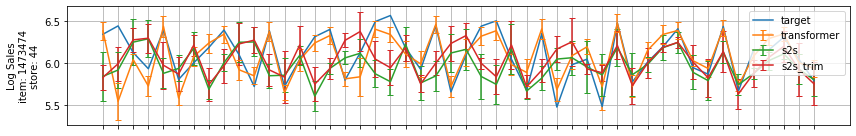

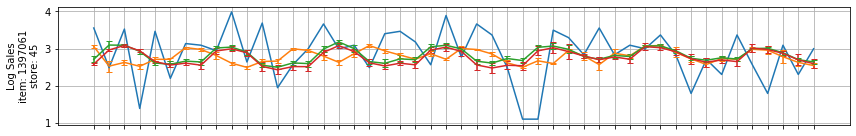

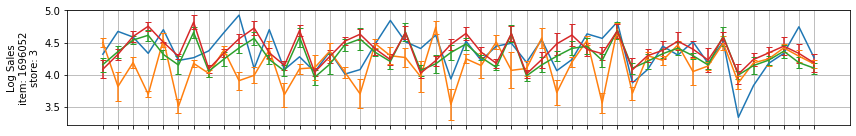

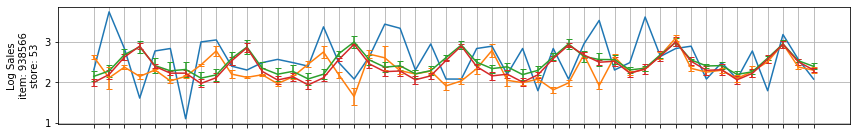

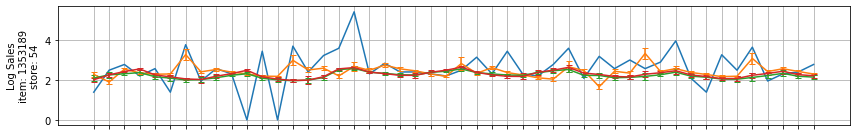

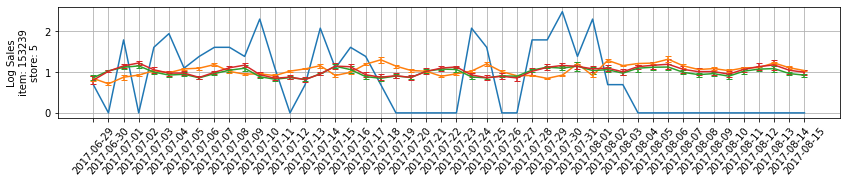

In [27]:
for i in range(len(item_nbrs)):
    store_nbr = store_nbrs[i]
    item_nbr = item_nbrs[i]
    m = -1
    target_plotted=False
    if i<(len(item_nbrs)-1):
        plt.figure(figsize=(12, 2))
    else:
        plt.figure(figsize=(12, 2.65))
    
    for mdl in tqdm(df_unified.model.unique()):
        df_ts = df_unified.loc[lambda d:(d.store_nbr == store_nbr) & (d.item_nbr == item_nbr) & (d.model == mdl)]

        mu = df_ts[df_ts.columns[df_ts.columns.str.contains("forecast")]].mean(axis=1)
        sigma = df_ts[df_ts.columns[df_ts.columns.str.contains("forecast")]].std(axis=1)
        target = df_ts.target
        x = df_ts.date

        if not target_plotted:
            target_plotted=True

            plt.plot(range(len(x)), target)

        plt.errorbar(range(len(x)), mu, yerr=sigma, capsize=3)
        m = max(m, max(target.max(), (mu+sigma).max()))
    plt.xticks(range(len(x)), x.astype(str), rotation=50)
    plt.grid()
    plt.ylabel(f"Log Sales\nitem: {item_nbr}\nstore: {store_nbr}")
    if i<(len(item_nbrs)-1):
        plt.gca().axes.set_xticklabels([])
    if i==0:
        plt.legend(["target"] + df_unified.model.unique().tolist(), loc="upper right")
    plt.tight_layout()
    plt.savefig(f"sample_{i}_log.eps")

100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
100%|██████████| 3/3 [00:04<00:00,  1.48s/it]


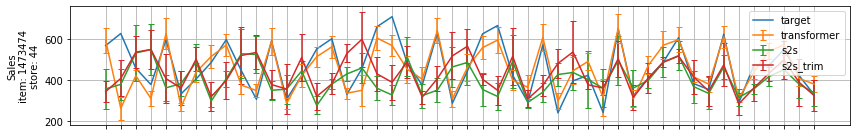

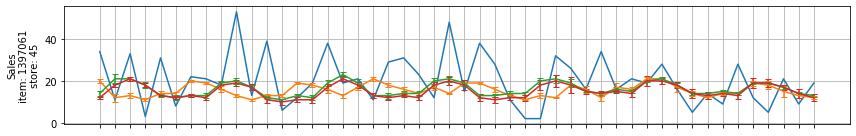

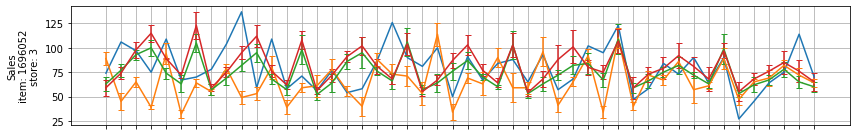

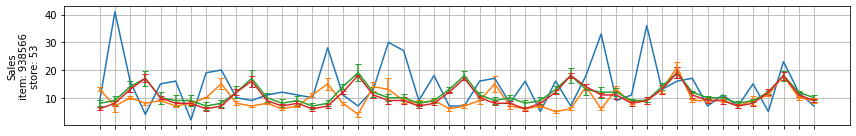

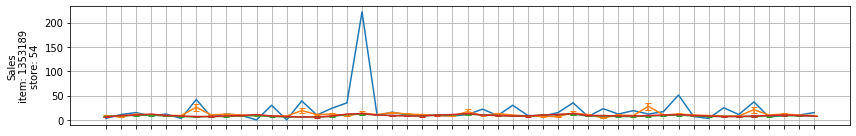

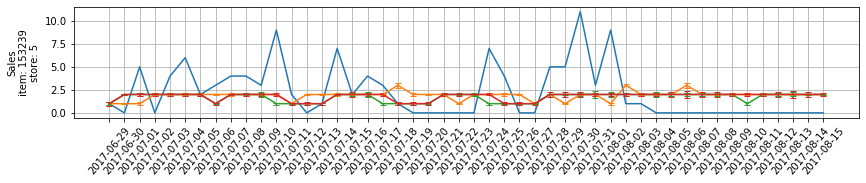

In [28]:
for i in range(len(item_nbrs)):
    store_nbr = store_nbrs[i]
    item_nbr = item_nbrs[i]
    m = -1
    target_plotted=False
    if i<(len(item_nbrs)-1):
        plt.figure(figsize=(12, 2))
    else:
        plt.figure(figsize=(12, 2.65))

    for mdl in tqdm(df_unified.model.unique()):
        df_ts = df_unified.loc[lambda d:(d.store_nbr == store_nbr) & (d.item_nbr == item_nbr) & (d.model == mdl)]

        mu = df_ts[df_ts.columns[df_ts.columns.str.contains("forecast")]].apply(np.expm1).mean(axis=1).round()
        sigma = df_ts[df_ts.columns[df_ts.columns.str.contains("forecast")]].apply(np.expm1).std(axis=1)
        target = df_ts.target.map(np.expm1)
        x = df_ts.date

        if not target_plotted:
            target_plotted=True

            plt.plot(range(len(x)), target)

        plt.errorbar(range(len(x)), mu, yerr=sigma, capsize=3)
        m = max(m, max(target.max(), (mu+sigma).max()))
    #plt.ylim(0,m)
    plt.xticks(range(len(x)), x.astype(str), rotation=50)
    plt.grid()
    plt.ylabel(f"Sales\nitem: {item_nbr}\nstore: {store_nbr}")
    if i<(len(item_nbrs)-1):
        plt.gca().axes.set_xticklabels([])
    if i==0:
        plt.legend(["target"] + df_unified.model.unique().tolist(), loc="upper right")

    plt.tight_layout()
    plt.savefig(f"sample_{i}_lin.eps")